<a href="https://colab.research.google.com/github/danieldrako/Manipulacion-Transformacion-Datos-Pandas-NumPy/blob/main/19Merge_Concat_Join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Existen diferentes formas de fusionar dos DataFrames. Esto se hace a través de la lógica de combinación como se muestra a continuación


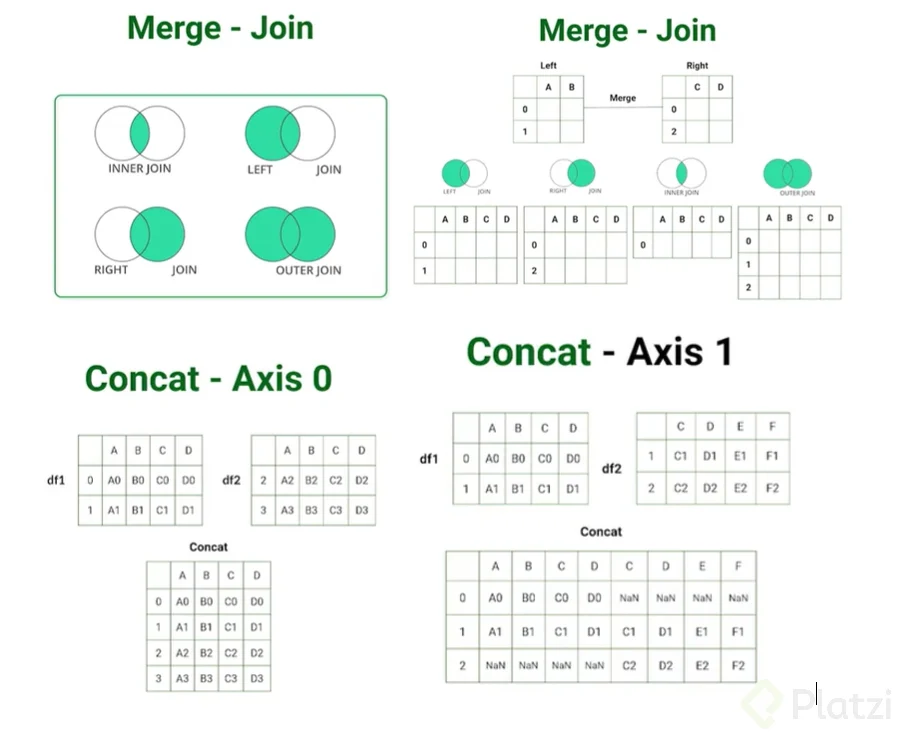

- Left join: Da prioridad al DataFrame de la izquierda. Trae siempre los datos de la izquierda y las filas en común con el DataFrame de la derecha.

- Right join: Da prioridad al DataFrame de la derecha. Trae siempre los datos de la derecha y las filas en común con el DataFrame de la izquierda.

- Inner join: Trae solamente aquellos datos que son común en ambos DataFrame

- Outer join: Trae los datos tanto del DataFrame de la izquierda como el de la derecha, incluyendo los datos que comparten ambos.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df1 = pd.DataFrame({'A':['A0', 'A1', 'A2','A3'],
        'B':['B0', 'B1', 'B2','B3'],
	      'C':['C0', 'C1', 'C2','C3'],
	      'D':['D0', 'D1', 'D2','D3']})

In [ ]:
df2 = pd.DataFrame({'A':['A4', 'A5', 'A6','A7'],
	'B':['B4', 'B5', 'B6','B7'],
	'C':['C4', 'C5', 'C6','C7'],
	'D':['D4', 'D5', 'D6','D7']})

In [ ]:
#Concatenar los DataFrames
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [ ]:
#Corregir los índices
pd.concat([df1,df2], ignore_index= True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [ ]:
#Por axis 1
pd.concat([df1,df2], axis = 1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


##Merge

Creamos DataFrame

In [ ]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
  'A' : ['A0', 'A1', 'A2','A3'],
  'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
  'C' : ['C0', 'C1', 'C2','C3'],
  'D': ['D0', 'D1', 'D2','D3']})
izq

,key,A,B
0,k0,A0,B0
1,k1,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [ ]:
der

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k3,C3,D3


In [ ]:
#Unir el DataFrame Der a Izq
izq.merge(der)

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [ ]:
#MERGE 2
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
 'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2','k3'],
 'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})
print(izq)
print(der)

  key   A   B
0  k0  A0  B0
1  k1  A1  B1
2  k2  A2  B2
3  k3  A3  B3
  key_2   C   D
0    k0  C0  D0
1    k1  C1  D1
2    k2  C2  D2
3    k3  C3  D3


In [ ]:
#Hay diferencias entre algunas columnas, por esa razón hay que separarlos de esta manera:
izq.merge(der, left_on = 'key', right_on='key_2')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,k3,C3,D3


In [ ]:
#MERGE 3

izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
 'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2',np.nan],
 'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})

In [ ]:
#Si tenemos un NaNen nuestro DataFrame, pandas no lo detectará como un mach. 
#Se soluciona con How, dando así, una preferencia.
izq.merge(der, left_on = 'key', right_on='key_2', how='left')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,NaN,NaN,NaN


#Join- index-match

Join Es otra herramienta para hacer exactamente lo mismo, una combinación. La diferencia es que join va a ir a los índices y no a columnas específicas.

In [ ]:
izq = pd.DataFrame({'A': ['A0','A1','A2'],
  'B':['B0','B1','B2']},
  index=['k0','k1','k2'])

der =pd.DataFrame({'C': ['C0','C1','C2'],
  'D':['D0','D1','D2']},
  index=['k0','k2','k3']) 
izq

,A,B
k0,A0,B0
k1,A1,B1
k2,A2,B2


In [ ]:
der

,C,D
k0,C0,D0
k2,C1,D1
k3,C2,D2


In [ ]:
izq.join(der)

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [ ]:
#Traer todos los datos aunque no hagan mach.
izq.join(der, how = 'outer')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2


In [ ]:
izq.join(der, how = 'inner')

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1


In [ ]:
izq.join(der, how = 'left')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [ ]:
izq.join(der, how = 'right')

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2
